- ### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
## Goal
- ### It is your job to predict if a passenger survived the sinking of the Titanic or not.For each in the test set, you must predict a 0 or 1 value for the variable.
 ## Metric
- ### Your score is the percentage of passengers you correctly predict. This is known as accuracy.

In [1]:
#Importing the Libraries
import pandas as pd , numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',300)
%matplotlib inline

In [2]:
#Load the data
data_train=pd.read_csv('Titanic_train.csv')
data_test=pd.read_csv('Titanic_test.csv')

In [3]:
data_train.shape,data_test.shape

((891, 12), (418, 11))

In [4]:
data_train.columns,data_test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [5]:
data=data_train.copy()

In [6]:
#Reading the first five rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Observing the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Checking the Statistics of data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Missing Values

In [9]:
#Percentage of null vlaues in each features
print(data.isnull().sum()/len(data)*100,'\n**************\n',data_test.isnull().sum()/len(data)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64 
**************
 PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64


In [10]:
#Dropping the columns Cabin since large data 77% is missing Also in Test set too
data.drop('Cabin',axis=1,inplace=True)
data_test.drop('Cabin',axis=1,inplace=True)

In [11]:
#Verifying the shape and record
print(data.shape,data_test.shape)

(891, 11) (418, 10)


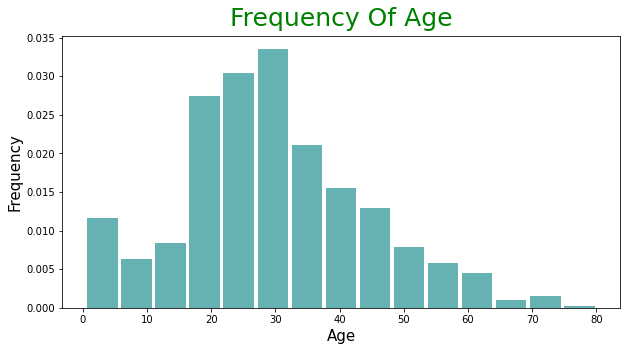

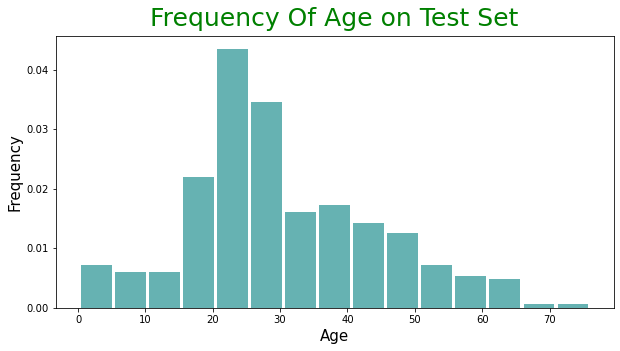

In [12]:
#Plottingt he graph of frequency of Age
plt.figure(figsize=(10,5))
data['Age'].plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='teal',rwidth=0.90)
plt.title('Frequency Of Age',color='Green',fontsize=25,pad=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()


plt.figure(figsize=(10,5))
data_test['Age'].plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='teal',rwidth=0.90)
plt.title('Frequency Of Age on Test Set',color='Green',fontsize=25,pad=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.show()

## Observations:
- It can be observed that at arounf age 28-30 have maximum passeger
- there are least passenger at higher age that is above 65.

In [13]:
#Veriying the no of pasenger at different percetile
print(data.Age.quantile([0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]),'\n*****\n Test Set',data_test.Age.quantile([0.1,0.2,0.3,0.4,0.5,0.7,0.8,0.9]))

0.1    14.0
0.2    19.0
0.3    22.0
0.4    25.0
0.5    28.0
0.7    36.0
0.8    41.0
0.9    50.0
Name: Age, dtype: float64 
*****
 Test Set 0.1    16.1
0.2    20.0
0.3    22.0
0.4    25.0
0.5    27.0
0.7    36.0
0.8    42.0
0.9    50.0
Name: Age, dtype: float64


In [14]:
print(int(data.Age.mean()),'::::::',int(data_test.Age.mean()))

29 :::::: 30


In [15]:
#Imputing missing value in Age Column
#Since most of the travel Passenger are of the age in between 28-30 , the value is replace by Mean

data.Age=data.Age.fillna(int(data.Age.mean()))
data_test.Age=data_test.Age.fillna(int(data.Age.mean()))

In [16]:
print(data.isnull().sum()/len(data)*100,'\n**************\n',data_test.isnull().sum()/len(data)*100)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64 
**************
 PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.112233
Embarked       0.000000
dtype: float64


In [17]:
#Verifying the null value on  Embarked Column
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [18]:
#Checking the level in Embarked 
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Observation 
- It can be observed that most of the passenger are of S

In [19]:
#Replacing Null values with mode  
data.Embarked=data.Embarked.fillna(data.Embarked.mode()[0])

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
data_test[data_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [22]:
data_test[(data_test['Pclass']==3) & (data_test['SibSp']==0) & (data_test['Parch']==0) & 
         (data_test['Embarked']=='S')]['Fare'].mean()

9.339329670329667

In [23]:
# Averag is coming as 9 so imputing with 9 
data_test['Fare'].fillna(9,inplace=True)

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Exploring the Columns

## AGE

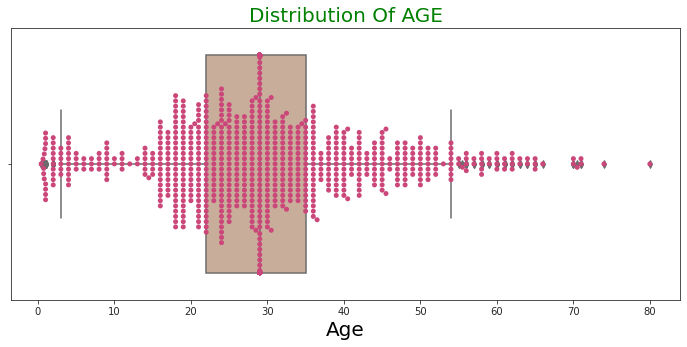

In [25]:
plt.figure(figsize=(12,5))
sns.set_style("ticks")
sns.boxplot(data['Age'],palette='pink')
sns.swarmplot(data['Age'],palette='plasma_r')
sns.set_style('darkgrid')
plt.title('Distribution Of AGE',color='Green',fontsize=20)
plt.xlabel('Age',color='Black',fontsize=20)
plt.show()

In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## SURVIVED

In [27]:
print('Value of survival and not survived:\n',data.Survived.value_counts(),'\n******************'
      '\nNormalize value of survival passenger:\n',data.Survived.value_counts(normalize=True)*100)

Value of survival and not survived:
 0    549
1    342
Name: Survived, dtype: int64 
******************
Normalize value of survival passenger:
 0    61.616162
1    38.383838
Name: Survived, dtype: float64


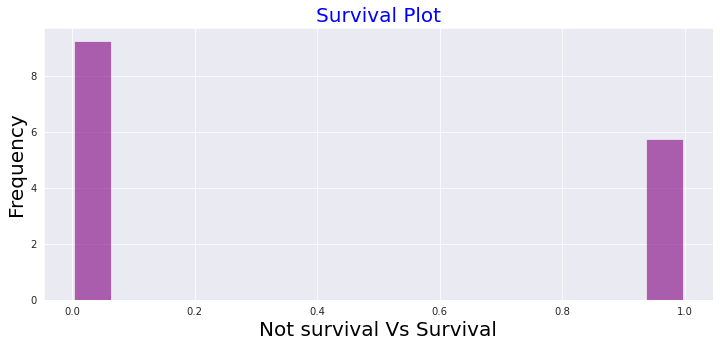

In [28]:
plt.figure(figsize=(12,5))
#sns.distplot(data.Pclass,color='Black')
data['Survived'].plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='Purple',rwidth=0.90)
sns.set_style('darkgrid')
plt.title('Survival Plot',color='Blue',fontsize=20)
plt.xlabel('Not survival Vs Survival',color='Black',fontsize=20)
plt.ylabel('Frequency',color='Black',fontsize=20)
plt.show()

## Observations:
- It can be observed about 61% passenger died 
- 38% were able to live in disaster

## PClass- Passenger Class

In [29]:
print('Value of survival and not survived:\n',data.Pclass.value_counts(),'\n******************'
      '\nNormalize value of survival passenger:\n',data.Pclass.value_counts(normalize=True)*100)

Value of survival and not survived:
 3    491
1    216
2    184
Name: Pclass, dtype: int64 
******************
Normalize value of survival passenger:
 3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


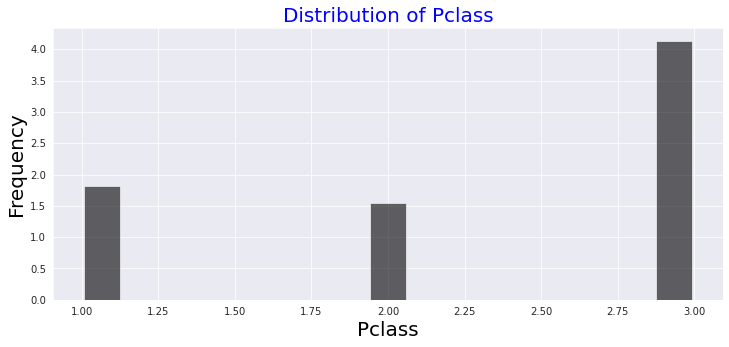

In [30]:
plt.figure(figsize=(12,5))
#sns.distplot(data.Pclass,color='Black')
data['Pclass'].plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='Black',rwidth=0.90)
sns.set_style('darkgrid')
plt.title('Distribution of Pclass',color='Blue',fontsize=20)
plt.xlabel('Pclass',color='Black',fontsize=20)
plt.ylabel('Frequency',color='Black',fontsize=20)
plt.show()

## Observation
- It can be seen that passenger travelled are more are from class 3 then class 1 and class 2

# Checking Columns and categorising into different variable

In [31]:
#Copying the data to df
df=data.copy()

In [32]:
#Creating a list l which is having Titles of all the passenger
l=[]
l_test=[]
for i in range(len(df)):
    df['Name'][i].split(',')[1].split('.')[0].strip()
    l.append(df['Name'][i].split(',')[1].split('.')[0].strip())
    
#for test set
for i in range(len(data_test)):
    data_test['Name'][i].split(',')[1].split('.')[0].strip()
    l_test.append(data_test['Name'][i].split(',')[1].split('.')[0].strip())
    

In [33]:
set(l)

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [34]:
set(l_test)

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

In [35]:
#creating a new column Passenger_titles which is having only titles of Passenger
df['Passenger_titles']=pd.DataFrame(l)
data_test['Passenger_titles']=pd.DataFrame(l_test)

In [36]:
#Observing First five records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [37]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Embarked          891 non-null    object 
 11  Passenger_titles  891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
#Verifying the no of Unique Titles present in Passenger_titles and with the total count
df['Passenger_titles'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Jonkheer          1
Capt              1
Lady              1
Don               1
Mme               1
Sir               1
Ms                1
Name: Passenger_titles, dtype: int64

In [39]:
data_test['Passenger_titles'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Passenger_titles, dtype: int64

In [40]:
# Creating UniqueTitles that is Mr, Mrs, Miss and Master for the below titles 
def str_map(x):
        return x.map({'Don':'Mr', 'Major':'Mr', 'Capt':'Mr','Jonkheer':'Mr',
                      
                      'Rev':'Mr', 'Col':'Mr','Sir':'Mr',
                      
                      'the Countess':'Mrs','Mme':'Mrs','Mlle':'Miss', 'Ms':'Miss',
                      
                      'Miss':'Miss','Master':'Master',
                      
                      'Mr':'Mr','Mrs':'Mrs',
                      
                      'Dr':'Dr','Lady':'Mrs'})
    
df[['Passenger_titles']]=df[['Passenger_titles']].apply(str_map)
data_test[['Passenger_titles']]=data_test[['Passenger_titles']].apply(str_map)

In [41]:
#Verifying the no of Unique Titles present in Passenger_titles and with the total count
df['Passenger_titles'].value_counts()

Mr        531
Miss      185
Mrs       128
Master     40
Dr          7
Name: Passenger_titles, dtype: int64

In [42]:
data_test['Passenger_titles'].value_counts()

Mr        244
Miss       79
Mrs        72
Master     21
Dr          1
Name: Passenger_titles, dtype: int64

In [43]:
# Mapping Dr title with Mr if Sex of passenger is Male and with Mrs if gender of Passenger is Female
for i in range(len(data)):
    if (df['Sex'].iloc[i]=='male') & (df['Passenger_titles'].iloc[i]=='Dr'):
        df['Passenger_titles'].iloc[i]='Mr'
    elif (df['Sex'].iloc[i]=='female') & (df['Passenger_titles'].iloc[i]=='Dr'):
        df['Passenger_titles'].iloc[i]='Mrs'
for i in range(len(data_test)):
    if (data_test['Sex'].iloc[i]=='male') & (data_test['Passenger_titles'].iloc[i]=='Dr'):
        data_test['Passenger_titles'].iloc[i]='Mr'
    elif (data_test['Sex'].iloc[i]=='female') & (data_test['Passenger_titles'].iloc[i]=='Dr'):
        data_test['Passenger_titles'].iloc[i]='Mrs'

In [44]:
#Verifying the no of Unique Titles present in Passenger_titles and with the total count
df['Passenger_titles'].value_counts()

Mr        537
Miss      185
Mrs       129
Master     40
Name: Passenger_titles, dtype: int64

In [45]:
data_test['Passenger_titles'].value_counts()

Mr        245
Miss       79
Mrs        72
Master     21
Name: Passenger_titles, dtype: int64

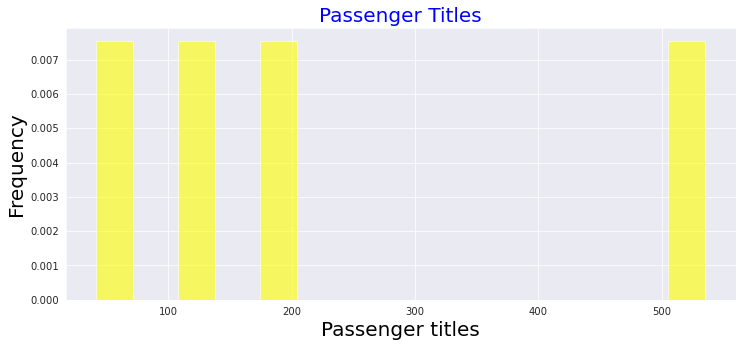

In [46]:
plt.figure(figsize=(12,5))
df['Passenger_titles'].value_counts().plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='Yellow',rwidth=0.90)
sns.set_style('whitegrid')
plt.title('Passenger Titles',color='Blue',fontsize=20)
plt.xlabel('Passenger titles',color='Black',fontsize=20)
plt.ylabel('Frequency',color='Black',fontsize=20)
plt.show()

## Observation
- It can be observed that most of the are Of the titles Mr. and Then Miss.
- very few Passenger are Master.

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Siblings or Spouse

In [48]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

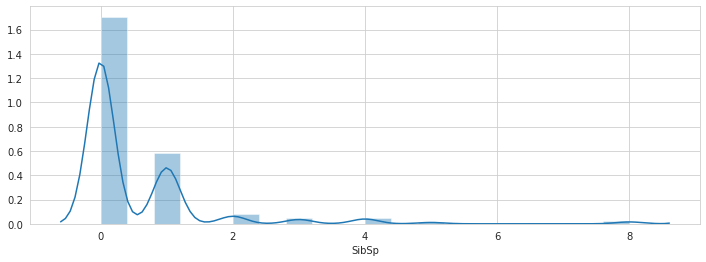

In [49]:
plt.figure(figsize=(12,4))
sns.distplot(df['SibSp'],bins=20)
sns.set_style('whitegrid')

# Parents or Children

In [50]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

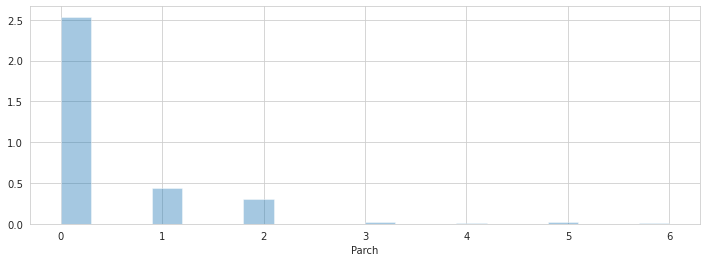

In [51]:
plt.figure(figsize=(12,4))
sns.distplot(df['Parch'],bins=20)
sns.set_style('whitegrid')

In [52]:
# creating column as total memeber in family which is sum of siblings/spouse and parents/chldren for each passenger
df['family']=df['SibSp']+df['Parch']
data_test['family']=data_test['SibSp']+data_test['Parch']

In [53]:
df['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

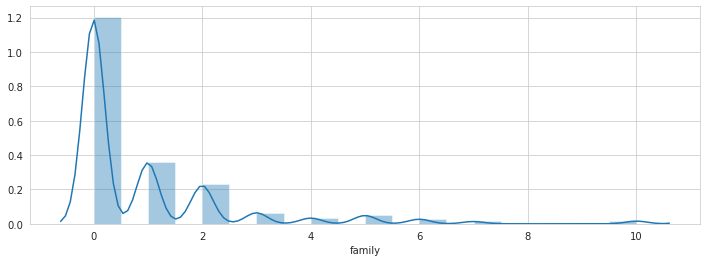

In [54]:
plt.figure(figsize=(12,4))
sns.distplot(df['family'],bins=20)
sns.set_style('whitegrid')

In [55]:
#Combining other level to one level/ reducing the levels
df['SibSp']=df['SibSp'].apply(lambda x:x if (x==0 or x==1) else 'More than 1')
df['Parch']=df['Parch'].apply(lambda x:x if (x==0 or x==1) else 'More than 1')
df['family']=df['family'].apply(lambda x:x if (x==0 or x==1 or x==2) else 'More than 2')

In [56]:
data_test['SibSp']=data_test['SibSp'].apply(lambda x:x if (x==0 or x==1) else 'More than 1')
data_test['Parch']=data_test['Parch'].apply(lambda x:x if (x==0 or x==1) else 'More than 1')
data_test['family']=data_test['family'].apply(lambda x:x if (x==0 or x==1 or x==2) else 'More than 2')

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_titles,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [58]:
df['Alone_traveller']=np.where(df['family']==0,1,0)
data_test['Alone_traveller']=np.where(data_test['family']==0,1,0)

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Passenger_titles,family,Alone_traveller
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,1


In [60]:
df['Alone_traveller'].value_counts()

1    537
0    354
Name: Alone_traveller, dtype: int64

In [61]:
data_test['Alone_traveller'].value_counts()

1    253
0    165
Name: Alone_traveller, dtype: int64

In [62]:
print('Value of survival and not survived:\n',df['Alone_traveller'].value_counts(),'\n******************'
      '\nNormalize value of survival passenger:\n',df['Alone_traveller'].value_counts(normalize=True)*100)

Value of survival and not survived:
 1    537
0    354
Name: Alone_traveller, dtype: int64 
******************
Normalize value of survival passenger:
 1    60.26936
0    39.73064
Name: Alone_traveller, dtype: float64


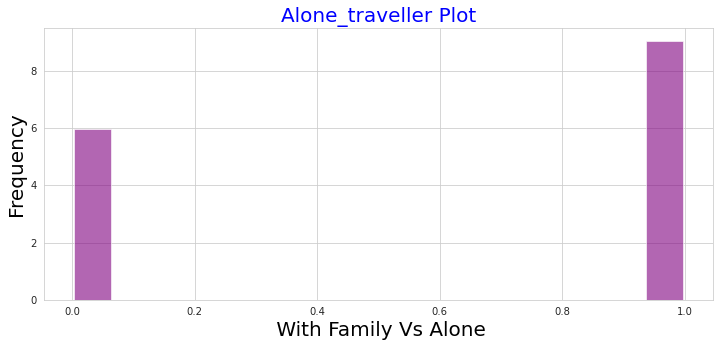

In [63]:
plt.figure(figsize=(12,5))
df['Alone_traveller'].plot(kind='hist',bins=15,alpha=0.6,stacked=True,density=True,color='Purple',rwidth=0.90)
sns.set_style('darkgrid')
plt.title('Alone_traveller Plot',color='Blue',fontsize=20)
plt.xlabel(' With Family Vs Alone',color='Black',fontsize=20)
plt.ylabel('Frequency',color='Black',fontsize=20)
plt.show()

## Observation
- It can be observed that The person travelling Alone has survived more than with Family Members

## Fare

In [64]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

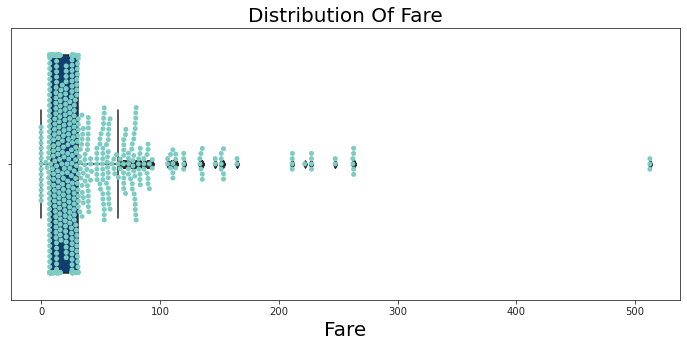

In [ ]:
plt.figure(figsize=(12,5))
sns.set_style("ticks")
sns.boxplot(data['Fare'],palette='ocean_r')
sns.swarmplot(data['Fare'],palette='GnBu_r')
plt.title('Distribution Of Fare',color='Black',fontsize=20)
plt.xlabel('Fare',color='Black',fontsize=20)
plt.show()

## Observation ,
- It can be Observed that most The fare price is in between 0-30 and very few passenger has paid high fare which
- more than 500.

In [ ]:
df['Fare'].describe()

In [ ]:
df['Fare'].quantile([0.1,0.5,0.7,0.8,0.9,0.95,0.99,0.999,0.9999,1])

In [ ]:
df['Fare'].describe()

In [ ]:
# Creating Category for the Passenger according to Fair
df['Fare_Category'] = pd.cut(df['Fare'], bins=[0,14.45,39,100,520],labels=['Poor','Middle','High-Middle','Rich'])
data_test['Fare_Category'] = pd.cut(data_test['Fare'], bins=[0,14.45,39,100,520],labels=['Poor','Middle','High-Middle','Rich'])

In [ ]:
df['Fare_Category'].value_counts()

In [ ]:
df['Fare_Category'].value_counts()

In [ ]:
df.head()

## Embarked: Southampton, Cherbourg, and Queenstown.

In [ ]:
df['Embarked'].value_counts()

-  More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded.
-  from Queenstown. People who boarded from Cherbourg had a higher chance of survival than people who boarded from.
-  Southampton or Queenstown.

## Exploratory Data Analysis

In [ ]:
df.head()

## We will Analysis thorugh graphs which kind of people have High chnaces of Survival 

In [ ]:
#Creating Datframe Who Has Survived in Disaster
df_1=df[df['Survived']==1]
#Creating DataFrame who hasnt Survived in Disaster
df_0=df[df['Survived']==0]

In [ ]:
df_1.shape,df_0.shape

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df['Survived'])
plt.title('Distribution of Survival in the Disaster')
plt.subplot(1,2,2)
label=['Non Survival','Survival']
plt.pie(pd.value_counts(df['Survived'],normalize=True)*100,autopct='%1.2f%%',
        shadow=True,explode=(.1,0),labels=label,startangle=100)
plt.show()

## Categorical - Numerical

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df_1['Survived'],y=df_1['Age'],)
plt.subplot(1,2,2)
sns.boxplot(x=df_0['Survived'],y=df_0['Age'],color='pink')

In [ ]:
df.groupby('Fare_Category')['Survived'].mean().plot.bar(color='teal')
plt.xlabel('Fare_Category',fontsize=20,color='Green')
plt.show()
df.groupby('Passenger_titles')['Survived'].mean().plot.bar(color='Pink')
plt.xlabel('Passenger_titles',fontsize=20,color='Green')
plt.show()
df.groupby('Embarked')['Survived'].mean().plot.bar(color='Green')
plt.xlabel('Embarked',fontsize=20,color='Green')
plt.show()

-  More than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded.
-  from Queenstown. People who boarded from Cherbourg had a higher chance of survival than people who boarded from.
-  Southampton or Queenstown.

In [ ]:
df_0.head(2)

In [ ]:
num_var=['Age','Fare']
cat_var=['Pclass','Sex','family','Embarked','Passenger_titles','Alone_traveller','Fare_Category']

In [ ]:
for i in cat_var:
    plt.figure(figsize=(17,4))
    plt.subplot(1,2,1)
    (df_1[i].value_counts(normalize=True)*100).plot(kind='barh',color='purple')
    plt.xlabel(i)
    plt.title('Survival of Disaster',color='g',fontsize=15)
    plt.subplot(1,2,2)
    (df_0[i].value_counts(normalize=True)*100).plot.barh(color='pink')
    plt.xlabel(i)
    plt.title('Non-Survival of Disaster',color='b',fontsize=15)
    plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.heatmap(df_1[num_var].corr(),cmap='YlGnBu',annot=True)
plt.title('Heat Map for Survival',color='green',fontsize=20)
plt.subplot(1,2,2)
sns.heatmap(df_0[num_var].corr(),cmap='YlGnBu',annot=True)
plt.title('Heat Map for Non-Survival',color='orange',fontsize=20)
plt.show()

In [ ]:
for i in cat_var:
    for j in num_var:
        
        plt.figure(figsize=(30,6))
        plt.subplot(1,2,1)
        sns.boxplot(df_1[i],df_1[j])
        plt.title('Survival',color='g',fontsize=20)
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        plt.subplot(1,2,2)
        sns.boxplot(df_0[i],df_0[j])
        plt.title('Non Survival',color='orange',fontsize=20)
        plt.xlabel(i,fontsize=20)
        plt.ylabel(j,fontsize=20)
        plt.show()

In [ ]:
for i in num_var:
    fig = plt.figure(figsize=(12,4))
    sns.distplot(df_1[i],hist=False,label='Survival')
    sns.distplot(df_0[i],hist=False,label='Non-Survival')
    plt.title(i)
    plt.show()

In [ ]:
for i in cat_var:
    for j in cat_var:
        
        plt.figure(figsize=(20,6))
        plt.subplot(1,2,1)
        sns.countplot(data=df_1,x=i,hue=j)
        plt.title('Survival',color='g',fontsize=20)
        plt.subplot(1,2,2)
        sns.countplot(data=df_0,x=i,hue=j)
        plt.title('Non Survival',color='orange',fontsize=20)
        plt.show()

## Data Preparation for Modelling

## Creating DUmmies for Categorical Variable

In [ ]:
df.head()

In [ ]:
#creating dummy features for categorical variable and droping first column
dummy1=pd.get_dummies(df[['Sex','Fare_Category']],drop_first=True)
df=pd.concat([df,dummy1],axis=1)

In [ ]:
#For test set
dummy1=pd.get_dummies(data_test[['Sex','Fare_Category']],drop_first=True)
data_test=pd.concat([data_test,dummy1],axis=1)

In [ ]:
pe=pd.get_dummies(df['Pclass'],prefix='Pclass')
pe.drop('Pclass_1',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)
pe=pd.get_dummies(df['Alone_traveller'],prefix='Alone_traveller')
pe.drop('Alone_traveller_0',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For test
pe=pd.get_dummies(data_test['Pclass'],prefix='Pclass')
pe.drop('Pclass_1',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)
pe=pd.get_dummies(data_test['Alone_traveller'],prefix='Alone_traveller')
pe.drop('Alone_traveller_0',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
pe=pd.get_dummies(df['Embarked'],prefix='Embarked')
pe.drop('Embarked_Q',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For test
pe=pd.get_dummies(data_test['Embarked'],prefix='Embarked')
pe.drop('Embarked_Q',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
pe=pd.get_dummies(df['SibSp'],prefix='SibSp')
pe.drop('SibSp_More than 1',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For test
pe=pd.get_dummies(data_test['SibSp'],prefix='SibSp')
pe.drop('SibSp_More than 1',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
pe=pd.get_dummies(df['Parch'],prefix='Parch')
pe.drop('Parch_More than 1',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For Test
pe=pd.get_dummies(data_test['Parch'],prefix='Parch')
pe.drop('Parch_More than 1',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
pe=pd.get_dummies(df['Passenger_titles'],prefix='Passenger_titles')
pe.drop('Passenger_titles_Master',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For Test
pe=pd.get_dummies(data_test['Passenger_titles'],prefix='Passenger_titles')
pe.drop('Passenger_titles_Master',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
pe=pd.get_dummies(df['family'],prefix='family')
pe.drop('family_More than 2',axis=1,inplace=True)
df=pd.concat([df,pe],axis=1)

In [ ]:
#For Test
pe=pd.get_dummies(data_test['family'],prefix='family')
pe.drop('family_More than 2',axis=1,inplace=True)
data_test=pd.concat([data_test,pe],axis=1)

In [ ]:
df.head()

In [ ]:
df.drop(['Pclass','Sex','SibSp','Parch','Embarked','Passenger_titles',
         'family','Alone_traveller','Fare_Category'],axis=1,inplace=True)

In [ ]:
data_test.drop(['Pclass','Sex','SibSp','Parch','Embarked','Passenger_titles',
         'family','Alone_traveller','Fare_Category'],axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
data_test.shape

## MODELLING

In [ ]:
df_model=df.copy()

In [ ]:
df_model.isnull().sum()

## SCALING

In [ ]:
df.head()

In [ ]:
X_train=df_model.drop(['PassengerId','Survived','Ticket','Name'],axis=1)
X_test=data_test.drop(['PassengerId','Ticket','Name'],axis=1)

In [ ]:
y_train=df_model['Survived']

In [ ]:
X_train.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Age','Fare']]=scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()

In [ ]:
sum(data['Survived'])/len(data)*100

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True,cmap='YlGnBu')

In [ ]:
X_train.columns

In [ ]:
#These are few columns which are highly correlated, so dropping them
X_train.drop(['Fare_Category_Rich','Passenger_titles_Mr','family_0','Parch_0','SibSp_0'],axis=1,inplace=True)
data_test.drop(['Fare_Category_Rich','Passenger_titles_Mr','family_0','Parch_0','SibSp_0'],axis=1,inplace=True)

In [ ]:
#Checking the correlation matrix
sns.heatmap(X_train.corr(),annot=True,cmap='YlGnBu')

## First Model

In [ ]:
import statsmodels.api as sm

In [ ]:
lgr=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
lgr.fit().summary()

## Feature Selection Using RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,10)
rfe=rfe.fit(X_train,y_train)

In [ ]:
rfe.support_

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
col=X_train.columns[rfe.support_]

## Assesing Model

In [ ]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

In [ ]:
#Getting the predicting values
y_train_pred=res.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)

In [ ]:
y_train_pred_final=pd.DataFrame({'Name':df_model['Name'],'Survival':y_train.values,'Survival_Prob':y_train_pred})
y_train_pred_final['Passenger ID']=df_model['PassengerId']

In [ ]:
y_train_pred_final.set_index('Passenger ID')

In [ ]:
# Cretaing a new column predicted with 1 if Survival Prob > 0.5
y_train_pred_final['predicted']=y_train_pred_final['Survival_Prob'].apply(lambda x:
                                                                         0 if x<0.5 else 1)

In [ ]:
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

In [ ]:
confusion=metrics.confusion_matrix(y_train_pred_final.Survival,y_train_pred_final.predicted)
confusion

In [ ]:
# Lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Survival,y_train_pred_final.predicted))

## Checking VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
col=col.drop('Sex_male')

In [ ]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
y_train_pred=res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Survival_Prob']=y_train_pred
y_train_pred_final['predicted']=y_train_pred_final['Survival_Prob'].apply(lambda x:
                                                                         0 if x<0.5 else 1)

In [ ]:
y_train_pred_final.head()

In [ ]:
# Lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Survival,y_train_pred_final.predicted))

In [ ]:
confusion=metrics.confusion_matrix(y_train_pred_final.Survival,y_train_pred_final.predicted)
confusion

In [ ]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [ ]:
#Sensitivity
round(TP/float(TP+FN)*100,2)

In [ ]:
#Specificity
round(TN/(TN+FP)*100,2)

## ROC Curve

In [ ]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Survival, y_train_pred_final.Survival_Prob)

In [ ]:
#Optimal cutoff probability is that probability where we get balanced sensitivity and sfecificity
numbers=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Survival_Prob'].map(lambda x:0 if x<i else 1 )
y_train_pred_final.head()

In [ ]:
#Calculating Accuracy sensitivity and Specificity for cut off etween 0 .1 to 1
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survival, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
#Plotting the graphs for Cutoff 
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'])

plt.show()

In [ ]:
#from the curve we are taking optimal cutoff .39
y_train_pred_final['predicted']=y_train_pred_final['Survival_Prob'].apply(lambda x:
                                                                         0 if x<0.45 else 1)

In [ ]:
# Lets check the accuracy
print(metrics.accuracy_score(y_train_pred_final.Survival,y_train_pred_final.predicted))

In [ ]:
confusion=metrics.confusion_matrix(y_train_pred_final.Survival,y_train_pred_final.predicted)
confusion

In [ ]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [ ]:
#Sensitivity
round(TP/float(TP+FN)*100,2)

In [ ]:
#Specificity
round(TN/float(TN+FP)*100,2)

In [ ]:
#precision
round(TP/float(TP+FP),2)

In [ ]:
from sklearn.metrics import precision_recall_curve,precision_score,recall_score

In [ ]:
round(precision_score(y_train_pred_final.Survival,y_train_pred_final.predicted)*100,2)

In [ ]:
round(recall_score(y_train_pred_final.Survival,y_train_pred_final.predicted)*100,2)

## Pecison Recall Curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survival, y_train_pred_final.Survival_Prob)

In [ ]:
#Precision - Recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction on Data Test set

In [ ]:
data_test.head()

In [ ]:
X_test.head()

In [ ]:
#Fitting the transformation on X_tes
X_test[['Age','Fare']]=scaler.transform(X_test[['Age','Fare']])
X_test.head()

In [ ]:
X_test=X_test[col]

In [ ]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.shape

In [ ]:
y_test_pred=res.predict(X_test_sm)

In [ ]:
y_test_pred

In [ ]:
data_test.head()

In [ ]:
y_pred_final=pd.DataFrame({'PassengerID':data_test['PassengerId'],'Survival_Prob':y_test_pred})

In [ ]:
y_pred_final['Survived']=y_pred_final['Survival_Prob'].map(lambda x: 0 if x <0.45 else 1)
y_pred_final.head()

In [ ]:
Data_Test_Predicted=y_pred_final.copy()
Data_Test_Predicted.drop(['Survival_Prob'],axis=1,inplace=True)

In [ ]:
Data_Test_Predicted.head()

In [ ]:
sns.countplot(Data_Test_Predicted['Survived'])